In [2]:
import pandas as pd
import numpy as np 
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
y_test.shape

(10000,)

In [6]:
len(X_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

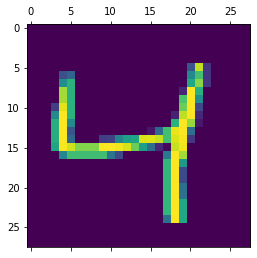

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
X_train_flattened=X_train.reshape(len(X_train),28* 28)
X_test_flattened=X_test.reshape(len(X_test),28* 28)


In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened.shape

(10000, 784)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4695 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3028 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2827 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - accuracy: 0.9258


In [26]:
X_train_flattened.shape

(60000, 784)

In [27]:
X_test_flattened.shape

(10000, 784)

In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 8s 2ms/step - loss: 0.2692 - accuracy: 0.9246


[0.26924413442611694, 0.9246000051498413]

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 3ms/step


array([3.6622673e-02, 2.7496503e-07, 6.4654171e-02, 9.6478266e-01,
       3.0275385e-03, 1.2959050e-01, 1.9654403e-06, 9.9981666e-01,
       1.2113331e-01, 7.2643232e-01], dtype=float32)

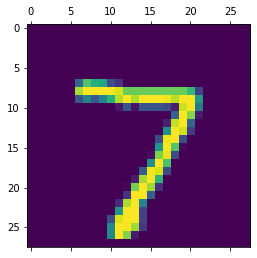

In [30]:
plt.matshow(X_test[0])

In [31]:
np.argmax(y_predicted[0])

7

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [33]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    8,  918,   20,   10,    2,   12,   11,   37,    4],
       [   4,    0,   18,  932,    0,   17,    3,   10,   18,    8],
       [   2,    1,    3,    1,  926,    0,    9,    3,    8,   29],
       [  12,    2,    2,   44,   11,  761,   17,    6,   29,    8],
       [  14,    3,    5,    2,    7,   11,  913,    2,    1,    0],
       [   2,    5,   21,    7,   10,    1,    0,  949,    2,   31],
       [  12,    7,    7,   28,    9,   21,    9,   11,  861,    9],
       [  11,    7,    1,   11,   37,    8,    0,   20,    3,  911]])>

Text(69.0, 0.5, 'Truth')

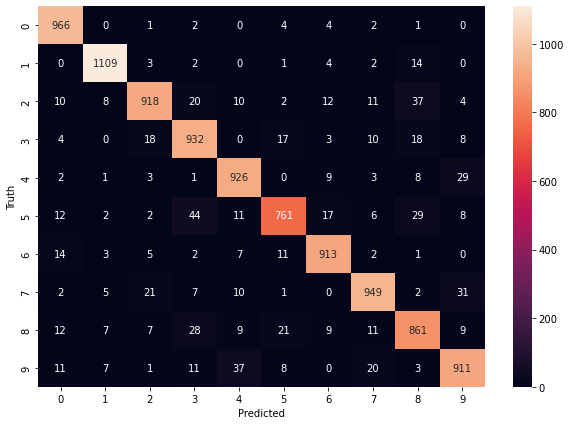

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2791 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1251 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9844


In [37]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 6s 4ms/step - loss: 0.0860 - accuracy: 0.9745


[0.08595068007707596, 0.9745000004768372]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

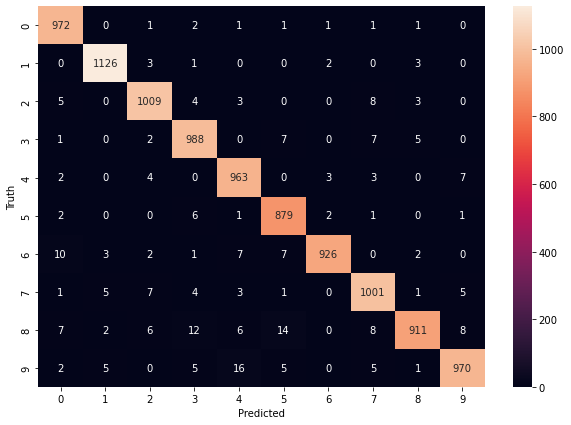

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2676 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0410 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9783


[0.07954484224319458, 0.9782999753952026]